In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [8]:
df=pd.read_csv('dummy_data.csv')
X=df['mother_height']
y=df['daughter_height']

In [87]:
def gradient_descent(X,y,alpha,iters=4):
    b0=0
    b1=0
    over_error = []
    for i in range(iters):
        for j in range(len(X)):
            y_pred = b0 + b1 * X[j]
            error = y_pred - y[j]
            b0 = b0 - alpha * error
            b1 = b1 - alpha * error * X[j]
            over_error.append(abs(error))
    
    return b0,b1, over_error

def metric(y,y_pred):
    error = np.mean(abs(y_pred-y))
    mse = np.mean((y_pred-y)**2)
    rmse = np.sqrt(mse)
    return error,mse,rmse

In [79]:
alpha=0.00001
iters=100
b0,b1, over_error=gradient_descent(X,y,alpha, iters)

y_pred = b0 + b1 * X
    
error, mse, rmse = metric(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.2f}")
print(f"Intercept: {b0:.2f}")
print(f"Coefficient: {b1:.2f}")

Mean Squared Error: 6.83
Root Mean Squared Error: 2.61
Intercept: 0.02
Coefficient: 1.00


In [68]:
X_np = X.values.reshape(-1, 1) 
y_np = y.values.ravel()  

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.0001, random_state=42)
sgd_regressor.fit(X_np, y_np)

y_pred = sgd_regressor.predict(X_np)

mse = mean_squared_error(y_np, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.2f}")
print(f"Intercept: {sgd_regressor.intercept_[0]:.2f}")
print(f"Coefficient: {sgd_regressor.coef_[0]:.2f}")


Mean Squared Error: 6.99
Root Mean Squared Error: 2.64
Intercept: 0.02
Coefficient: 1.00


In [75]:
#when mother's height is 63
d_height = b0 + b1 * 63
print(f"Predicetd daughter's height when mother's height is 63 is= {d_height:.0f}")

Predicetd daughter's height when mother's height is 63 is= 63


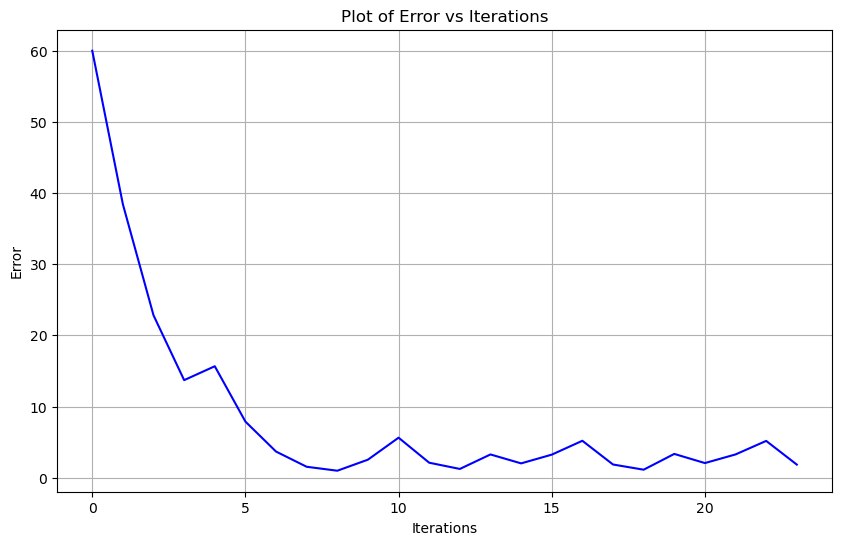

In [94]:
b0,b1, over_error=gradient_descent(X,y,0.0001, 4)
plt.figure(figsize=(10, 6))
plt.plot(range(24) , over_error, linestyle='-', color='b')

plt.title('Plot of Error vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Error')

plt.grid(True)

plt.show()

In [ ]:
# 2.
# Create a CSV file for the above training data and write a Python function program to find the fitted logistic
# regression with gradient descent technique. Compare the coefficients obtained from the sklearn model with
# your program. Compute the predicted y and assign the class label (prediction = 0 IF p(fail) < 0.5 and prediction
# = 1 IF p(pass) >= 0.5) and compute the accuracy. Find the error for each iteration and predict the probability
# that a student will pass the exam if they study for a) 3.5 hours b) 7.5 hours. Plot the graph of error in y-axis
# and iteration in x-axis with 3 epochs (8x3=24 iterations)

In [109]:
df2=pd.read_csv('dummy_data2.csv')
X = df2['hours']
y = df2['pass']

In [136]:
# np.random.seed(42)

def gradient_descent_logistic(X, y, alpha, iters):
    b0 = np.random.rand() * 0.01
    b1 = np.random.rand() * 0.01
    costs = []

    for i in range(iters):
        for j in range(len(X)):
            y_pred = sigmoid(b1*X[j] + b0)
            error = y_pred - y[j]
            b0 = b0 - alpha*error
            b1 = b1 - alpha*error*X[j]
#         log_loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        log_loss = -(1/len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        costs.append(log_loss)

    y_pred = sigmoid(b1*X + b0)
    df['predictions'] = y_pred

    y_class = (y_pred >= 0.5).astype(int)
    accuracy = np.mean(y_class == y)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    return y_pred, costs

In [140]:
y_pred, costs= gradient_descent_logistic(X,y,0.01,100)

Accuracy: 75.00%


Optimized parameters: [[4.79039552]], [0.00104045]
Accuracy: 100.00%


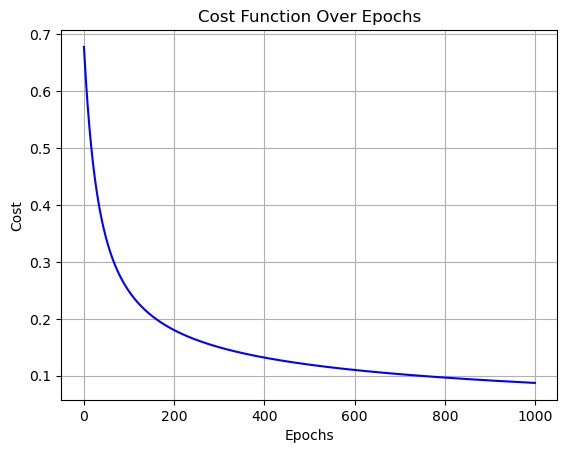

In [142]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_np = X.values.reshape(-1,1)
y_np = y.values.ravel()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

sgd_clf = SGDClassifier(
    loss='log_loss',        
    learning_rate='constant',
    eta0=0.01,                
    max_iter=1,              
    tol=None,
    random_state=42
)

num_epochs = 1000
cost_history = []

for epoch in range(num_epochs):
    sgd_clf.partial_fit(X_scaled, y_np, classes=np.unique(y_np))
    predictions = sgd_clf.predict_proba(X_scaled)
    predictions = np.clip(predictions, 1e-10, 1 - 1e-10) 
    cost = -np.mean(y_np * np.log(predictions[:, 1]) + (1 - y_np) * np.log(1 - predictions[:, 1]))
    cost_history.append(cost)


y_pred = sgd_clf.predict(X_scaled)
accuracy = accuracy_score(y_np, y_pred) * 100

print(f"Optimized parameters: {sgd_clf.coef_}, {sgd_clf.intercept_}")
print(f"Accuracy: {accuracy:.2f}%")

plt.plot(range(num_epochs), cost_history, 'b-')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost Function Over Epochs')
plt.grid(True)
plt.show()


In [ ]:
# 3.
# Consider the above dataset with two independent variables (X1 and X2) and a dependent variable (Y).
# Implement in python, how you can perform the logistic regression to model the relationship between the
# independent variables and the dependent variable.

In [143]:
sigmoid(10)

0.9999546021312976